In [ ]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#  Copyright (c) 2023. Mohamed Reda Bouadjenek, Deakin University              +
#           Email:  reda.bouadjenek@deakin.edu.au                              +
#                                                                              +
#  Licensed under the Apache License, Version 2.0 (the "License");             +
#   you may not use this file except in compliance with the License.           +
#    You may obtain a copy of the License at:                                  +
#                                                                              +
#                 http://www.apache.org/licenses/LICENSE-2.0                   +
#                                                                              +
#    Unless required by applicable law or agreed to in writing, software       +
#    distributed under the License is distributed on an "AS IS" BASIS,         +
#    WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.  +
#    See the License for the specific language governing permissions and       +
#    limitations under the License.                                            +
#                                                                              +
# ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

**Notebook author:** [Mohamed Reda Bouadjenek](https://rbouadjenek.github.io/), Lecturer of Applied Artificial Intelligence,

**Institution:** Deakin University, School of Information Technology, Faculty of Sci Eng & Built Env

**Adress:** Locked Bag 20000, Geelong, VIC 3220

**Phone:** +61 3 522 78380

**Email:** reda.bouadjenek@deakin.edu.au

<img style="float: left;" src="https://github.com/rbouadjenek/deakin-ai-challenge2023/blob/main/images/deakin2.png?raw=1" width="200">

# Introduction

**Welcome to the Notebook for the Deakin Simpsons Challenge 2023!**

![](https://github.com/rbouadjenek/deakin-ai-challenge2023/blob/main/images/Simpsons_cast.png?raw=1)


This Notebook allows you to build a classification model for The Deakin Simpsons challenge 2023. The **Deakin Simpsons challenge 2023** is a computer vision competition for which the goal is:


> **Given an image of simpsons and a natural language question about the image, the task is to provide an accurate natural language answer using machine learning and deep learning.**

The challenge is designed to provide students with the opportunity to work as team members, to compete with each other, and to enhance the student learning experience by improving their AI modeling, problem-solving, and team-working skills.



As participants, your goal is to build a machine learning/deep learning model to answer a natural language **Yes**/**No** question given an image of Simpsons using machine learning and deep learning.


Once you have built your model, you will have to submit it on the [CodaLab](https://codalab.lisn.upsaclay.fr/competitions/317?secret_key=1aab176a-2a97-46da-a214-711ff65b7e01) platform to be evaluated.
We evaluate the performance of your model using the [Accuracy](https://visualqa.org/evaluation.html)  on a private test set that we have directly collected and labeled from TV show episodes.
Once the evaluation completed, your entry will appear on the leaderboard to see your performance against other competitors.


In the following, we will take you through  a 6-step process to build a simple model to perform this task as follows:

1. `Setup the environment:` Thie first step consists of setting the environement and downloading the data.
2. `Preprocessing:` The second step is a preprocessing step that consists of resizing, plitting, and piping the input data.
3. `Exploring the data:` The third step consists of a simple data exploration step where you will see samples of the data and some statistics to help you in understanding the data.
4. `Designing the model:` The forth step consists of designing an architecture for the task.
5. `Traning:` The fifth step consists of starting the training process.
6. `Monitoring:` The sixth step consists of monitoring the traning process to investigate possible overfitting.
7. `Submitting:` The seventh and last step will take you through the submission process.




We evaluate the performance of your model using the [Accuracy](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)  on a private test set that we have directly collected and labeled from TV show episodes.



**References:**

- [VQA: Visual Question Ansewering](https://visualqa.org/)
- [VQA: Visual Question Answering (ICCV 2015)](https://arxiv.org/pdf/1505.00468.pdf)


# Setup the environment

First, you need now to load all the required packages for this Notebook.




In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.saving import hdf5_format
import matplotlib.pyplot as plt
import json
import os
import numpy as np
from sklearn.utils import shuffle
from tensorflow.keras.utils import plot_model
import random
import h5py
from sklearn.metrics import classification_report

##################
# Verifications:
#################


print('GPU is used.' if len(tf.config.list_physical_devices('GPU')) > 0 else 'GPU is NOT used.')
print("Tensorflow version: " + tf.__version__)

2023-07-13 10:36:39.784890: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


GPU is NOT used.
Tensorflow version: 2.12.0


# Downloading Dataset

Now, please run the following cell to download the dataset that you will use to build your model.

In [35]:
imgs_path_train = '/Users/niko/Desktop/Challenge/My_data/kaggle_simpson_testset'
imgs_path_val = '/Users/niko/Desktop/Challenge/data/simpsons_validation/'
q_train_file = '/Users/niko/Desktop/Challenge/My_data/q_train.json'
q_val_file = '/Users/niko/Desktop/Challenge/data/questions_validation.json'
anno_train_file = '/Users/niko/Desktop/Challenge/My_data/q_annotations.json'
anno_val_file = '/Users/niko/Desktop/Challenge/data/annotations_validation.json'

In [3]:
# imgs_path_train = '/Users/niko/Desktop/Challenge/data/scene_img_abstract_v002_train2015/'
# imgs_path_val = '/Users/niko/Desktop/Challenge/data/simpsons_validation/'
# q_train_file = '/Users/niko/Desktop/Challenge/data/OpenEnded_abstract_v002_train2015_questions.json'
# q_val_file = '/Users/niko/Desktop/Challenge/data/questions_validation.json'
# anno_train_file = '/Users/niko/Desktop/Challenge/data/abstract_v002_train2015_annotations.json'
# anno_val_file = '/Users/niko/Desktop/Challenge/data/annotations_validation.json'

# Data preprocessing


Define global variable that will be used for this challenge.


In [36]:
# We define the size of input images to 64x64 pixels.
size = 7
img_width = 2**size
img_height = 2**size
image_size = (img_height, img_width)


<span style="color:red;font-weight:bold;font: 24px">Warning: Please do not change the cell below!</span>


In [37]:
answers = ['yes', 'no']
num_answers = len(answers)

<span style="color:red;font-weight:bold;font: 24px">End Warning!</span>

<span style="color:red;font-weight:bold;font: 24px">----------------------------------------------------------------</span>


In [38]:
# Read the data files
q_train = json.load(open(q_train_file))
q_val = json.load(open(q_val_file))
anno_train = json.load(open(anno_train_file))
anno_val = json.load(open(anno_val_file))

'''
    Filter questions for which the answers are not in the set of possible answers.
'''
def my_filter_questions(questions, annotations, answers, imgs_path):
    # Make sure the questions and annotations are alligned
    questions['questions'] = sorted(questions['questions'], key=lambda x: x['question_id'])
    annotations['annotations'] = sorted(annotations['annotations'], key=lambda x: x['question_id'])
    q_out = []
    anno_out = []
    imgs_out = []
    q_ids = []
    question_ids_set = set()
    # Filter annotations
    for annotation in annotations['annotations']:
        if annotation['multiple_choice_answer'] in answers:
            question_ids_set.add(annotation['question_id'])
            q_ids.append(annotation['question_id'])
            anno_out.append(answers.index(annotation['multiple_choice_answer']))
    # Filter images and questions
    for q in questions['questions']:
        if q['question_id'] in question_ids_set:
            q_text = q['question'].lower()
            q_text = q_text.replace('?', ' ? ')
            q_text = q_text.replace('.', ' . ')
            q_text = q_text.replace(',', ' . ')
            q_text = q_text.replace('!', ' . ').strip()
            q_out.append(q_text)
            file_name = str(q['image_id'])
            while len(file_name) != 4:
                file_name = '0' + file_name
            file_name = imgs_path +'/'+ file_name +'.jpg'
            imgs_out.append(file_name)
    return imgs_out, q_out, anno_out, q_ids

def filter_questions(questions, annotations, answers, imgs_path):
    # Make sure the questions and annotations are alligned
    questions['questions'] = sorted(questions['questions'], key=lambda x: x['question_id'])
    annotations['annotations'] = sorted(annotations['annotations'], key=lambda x: x['question_id'])
    q_out = []
    anno_out = []
    imgs_out = []
    q_ids = []
    question_ids_set = set()
    # Filter annotations
    for annotation in annotations['annotations']:
        if annotation['multiple_choice_answer'] in answers:
            question_ids_set.add(annotation['question_id'])
            q_ids.append(annotation['question_id'])
            anno_out.append(answers.index(annotation['multiple_choice_answer']))
    # Filter images and questions
    for q in questions['questions']:
        if q['question_id'] in question_ids_set:
            # Preprocessing the question
            q_text = q['question'].lower()
            q_text = q_text.replace('?', ' ? ')
            q_text = q_text.replace('.', ' . ')
            q_text = q_text.replace(',', ' . ')
            q_text = q_text.replace('!', ' . ').strip()
            q_out.append(q_text)
            file_name = str(q['image_id'])
            while len(file_name) != 12:
                file_name = '0' + file_name
            file_name = imgs_path + questions['data_type'] + '_' + questions['data_subtype'] + '_' + file_name + '.png'
            imgs_out.append(file_name)
    return imgs_out, q_out, anno_out, q_ids


imgs_train, q_train, anno_train, q_ids_train = my_filter_questions(q_train, anno_train,
                                                                answers, imgs_path_train)
imgs_train, q_train, anno_train, q_ids_train = shuffle(imgs_train, q_train,
                                                       anno_train, q_ids_train, random_state=0)

imgs_val, q_val, anno_val, q_ids_val = filter_questions(q_val, anno_val,
                                                        answers, imgs_path_val)
imgs_val, q_val, anno_val, q_ids_val = shuffle(imgs_val, q_val,
                                               anno_val, q_ids_val, random_state=0)



In [7]:
# # Read the data files
# q_train = json.load(open(q_train_file))
# q_val = json.load(open(q_val_file))
# anno_train = json.load(open(anno_train_file))
# anno_val = json.load(open(anno_val_file))

# '''
#     Filter questions for which the answers are not in the set of possible answers.
# '''


# def filter_questions(questions, annotations, answers, imgs_path):
#     # Make sure the questions and annotations are alligned
#     questions['questions'] = sorted(questions['questions'], key=lambda x: x['question_id'])
#     annotations['annotations'] = sorted(annotations['annotations'], key=lambda x: x['question_id'])
#     q_out = []
#     anno_out = []
#     imgs_out = []
#     q_ids = []
#     question_ids_set = set()
#     # Filter annotations
#     for annotation in annotations['annotations']:
#         if annotation['multiple_choice_answer'] in answers:
#             question_ids_set.add(annotation['question_id'])
#             q_ids.append(annotation['question_id'])
#             anno_out.append(answers.index(annotation['multiple_choice_answer']))
#     # Filter images and questions
#     for q in questions['questions']:
#         if q['question_id'] in question_ids_set:
#             # Preprocessing the question
#             q_text = q['question'].lower()
#             q_text = q_text.replace('?', ' ? ')
#             q_text = q_text.replace('.', ' . ')
#             q_text = q_text.replace(',', ' . ')
#             q_text = q_text.replace('!', ' . ').strip()
#             q_out.append(q_text)
#             file_name = str(q['image_id'])
#             while len(file_name) != 12:
#                 file_name = '0' + file_name
#             file_name = imgs_path + questions['data_type'] + '_' + questions['data_subtype'] + '_' + file_name + '.png'
#             imgs_out.append(file_name)
#     return imgs_out, q_out, anno_out, q_ids


# imgs_train, q_train, anno_train, q_ids_train = filter_questions(q_train, anno_train,
#                                                                 answers, imgs_path_train)
# imgs_train, q_train, anno_train, q_ids_train = shuffle(imgs_train, q_train,
#                                                        anno_train, q_ids_train, random_state=0)

# imgs_val, q_val, anno_val, q_ids_val = filter_questions(q_val, anno_val,
#                                                         answers, imgs_path_val)
# imgs_val, q_val, anno_val, q_ids_val = shuffle(imgs_val, q_val,
#                                                anno_val, q_ids_val, random_state=0)


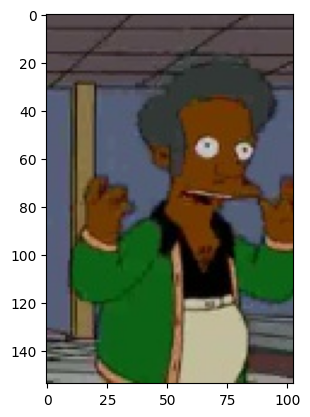

In [39]:
from matplotlib import image as mpimg

plt.imshow(mpimg.imread(imgs_train[2]))

We now prepare the vocabulary to be used.


In [41]:
# Get the vocabulary
vocab_size = 15000
vocab = {}
for q in q_train:
    q = q.split(' ')
    for token in q:
        v = vocab.get(token, 0)
        vocab[token] = v + 1
vocab = list(dict(sorted(vocab.items(), key=lambda x: -x[1])[0:vocab_size]).keys())
# Mapping tokens to integers
token_to_num = keras.layers.StringLookup(vocabulary=vocab)
# Mapping integers back to original tokens
num_to_token = keras.layers.StringLookup(vocabulary=token_to_num.get_vocabulary(),
                                         invert=True)
vocab_size = token_to_num.vocabulary_size()
print(f"The size of the vocabulary ={token_to_num.vocabulary_size()}")
print("Top 20 tokens in the vocabulary: ", token_to_num.get_vocabulary()[:20])


The size of the vocabulary =882
Top 20 tokens in the vocabulary:  ['[UNK]', 'the', 'in', 'is', 'picture', 'person', '?', 'a', 'there', 'this', 'man', 'are', 'on', 'wearing', 'does', 'people', 'holding', 'look', 'happy', 'sitting']


## Defining Map Functions

In [42]:
'''
    This function is used to process and encode a single sample.
'''


def encode_single_sample(img_file, q, anno):
    ###########################################
    ##  Process the Image
    ##########################################
    # 1. Read image file  
    img = tf.io.read_file(img_file)
    # 2. Decode the image
    img = tf.image.decode_jpeg(img, channels=3)
    # 3. Convert to float32 in [0, 1] range
    img = tf.image.convert_image_dtype(img, tf.float32)
    # 4. Resize to the desired size
    img = tf.image.resize(img, [img_height, img_width])
    ###########################################
    ##  Process the question
    ##########################################
    # 5. Split into list of tokens
    word_splits = tf.strings.split(q, sep=" ")
    # 6. Map tokens to indices
    q = token_to_num(word_splits)
    # 7. Return an inputs to for the model
    return (img, q), anno


## Creating `Dataset` objects

We create our `tf.data.Dataset` object that returns a new dataset containing the transformed elements, in the same order as they appeared in the input. The function `encode_single_sample` is used to change both the values and the structure of a dataset's elements.



In [43]:
# We define the batch size
batch_size = 128
# Define the trainig dataset
train_dataset = tf.data.Dataset.from_tensor_slices(
    (imgs_train, q_train, anno_train)
)
train_dataset = (
    train_dataset.map(encode_single_sample, num_parallel_calls=tf.data.AUTOTUNE)
        .padded_batch(batch_size)
        .prefetch(buffer_size=tf.data.AUTOTUNE)
)
# Define the validation dataset
val_dataset = tf.data.Dataset.from_tensor_slices(
    (imgs_val, q_val, anno_val)
)
val_dataset = (
    val_dataset.map(encode_single_sample, num_parallel_calls=tf.data.AUTOTUNE)
        .padded_batch(batch_size)
        .prefetch(buffer_size=tf.data.AUTOTUNE)
)

# Visualize the data

Let's visualize an example in our dataset, including the image, the question, and the corresponding answer.


2023-07-13 18:12:59.186240: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype string and shape [150]
	 [[{{node Placeholder/_1}}]]
2023-07-13 18:12:59.186748: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [150]
	 [[{{node Placeholder/_0}}]]


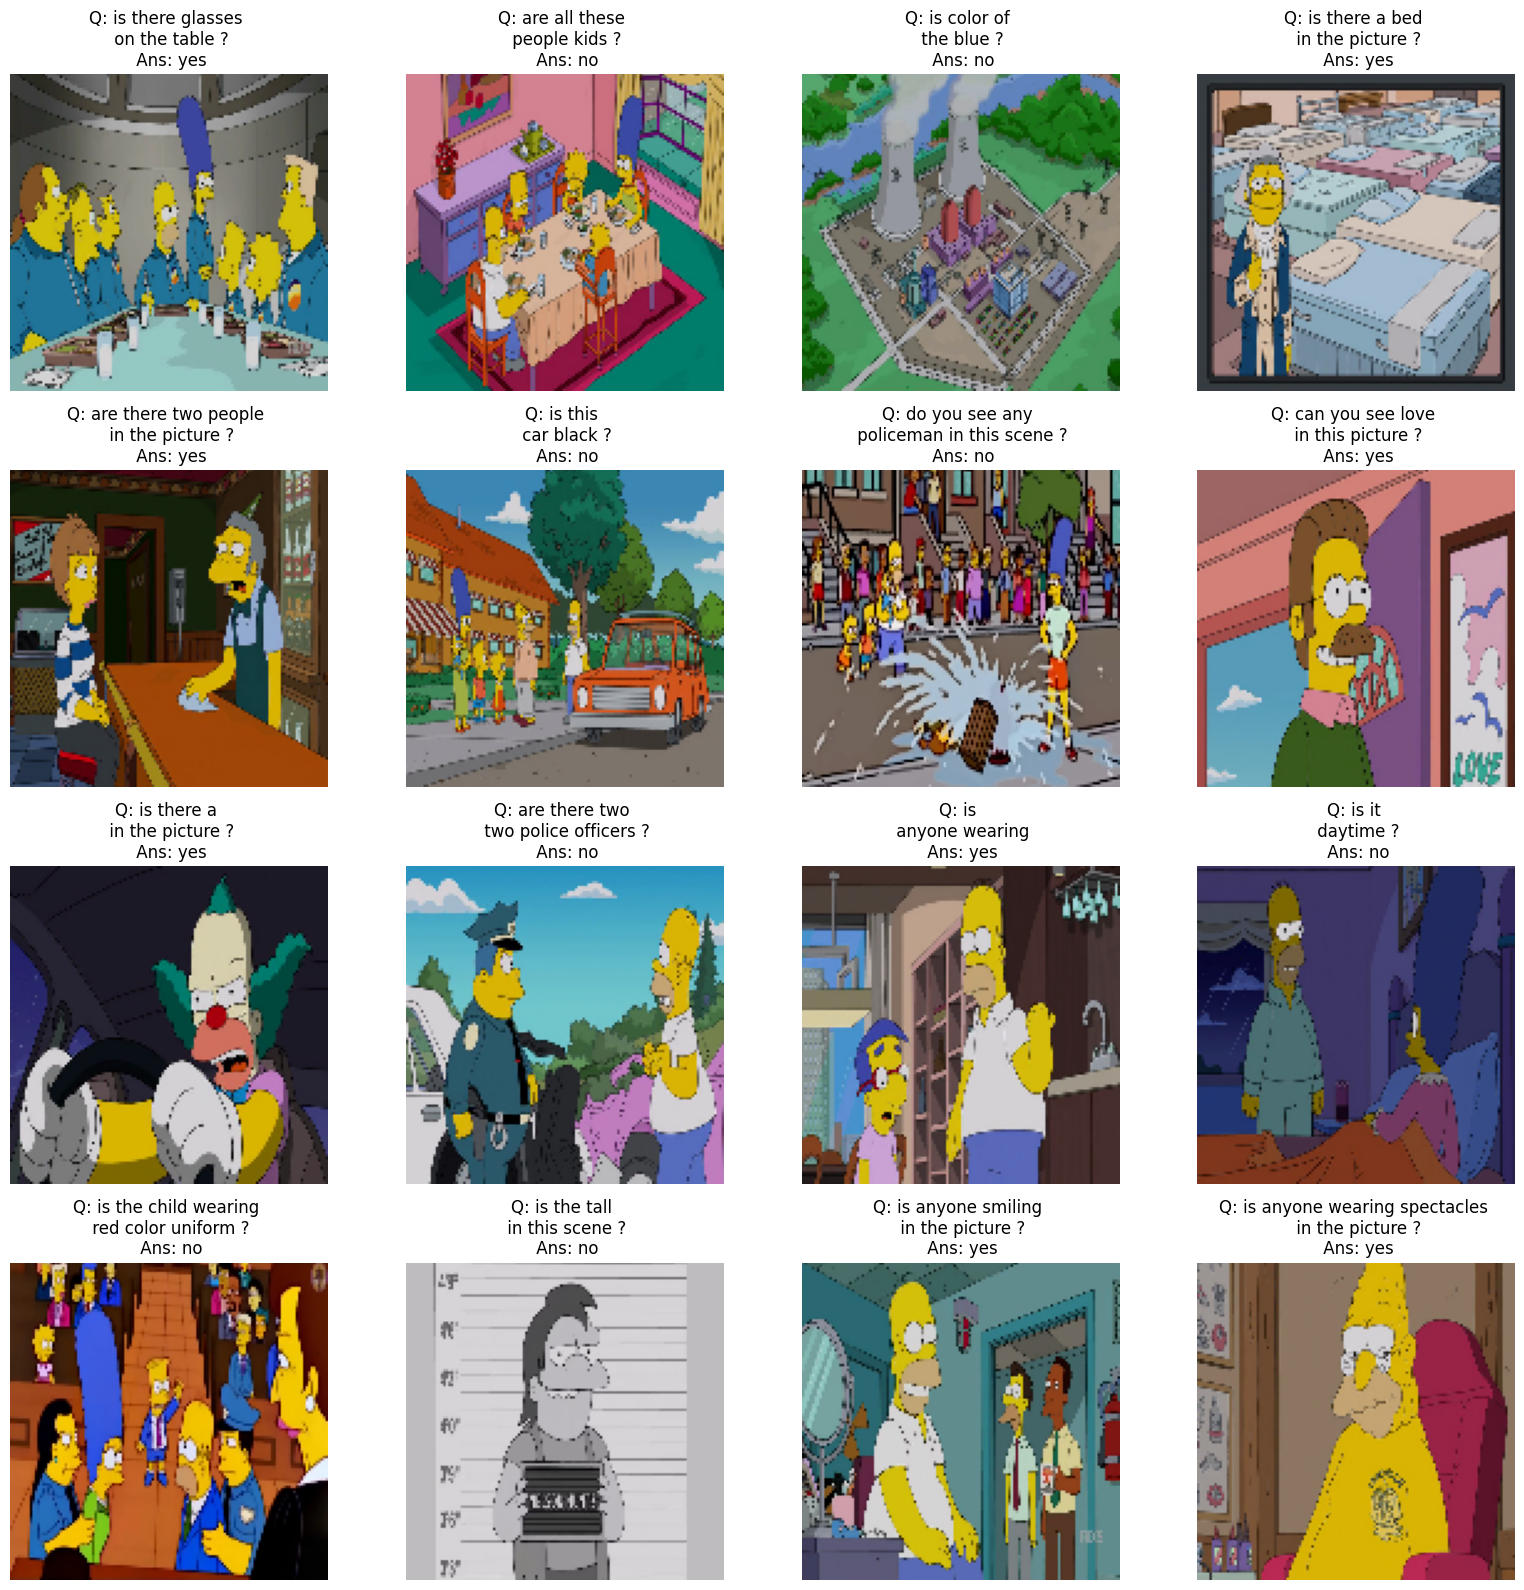

In [44]:
#  Let's check results on some validation samples
for batch in val_dataset.shuffle(random.randint(0, 200)).take(1):
    imgs_batch = batch[0][0]
    q_batch = batch[0][1]
    ans_batch = batch[1]
    answer_texts = [answers[i] for i in ans_batch]

    q_orig = []
    for q in q_batch:
        q = num_to_token(q).numpy()
        q = [t.decode("utf-8") for t in q]
        q = list(filter(('[UNK]').__ne__, q))
        q.insert(int(len(q) / 2), '\n')
        q = ' '.join(q)
        q_orig.append(q)

    _, ax = plt.subplots(4, 4, figsize=(16, 16))
    for i in range(16):
        img = (imgs_batch[i, :, :, :] * 255).numpy().astype(np.uint8)
        title = f"Q: {q_orig[i]}\n Ans: {answer_texts[i]}"
        ax[i // 4, i % 4].imshow(img)
        ax[i // 4, i % 4].set_title(title)
        ax[i // 4, i % 4].axis("off")

    plt.tight_layout()
    plt.show()


# Model

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_question (InputLayer)    [(None, None)]       0           []                               
                                                                                                  
 input_image (InputLayer)       [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 my_embed (Embedding)           (None, None, 20)     17640       ['input_question[0][0]']         
                                                                                                  
 resnet152 (Functional)         (None, 4, 4, 2048)   58370944    ['input_image[0][0]']      

2023-07-14 12:38:15.412190: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-07-14 12:38:15.413043: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-07-14 12:38:15.413921: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

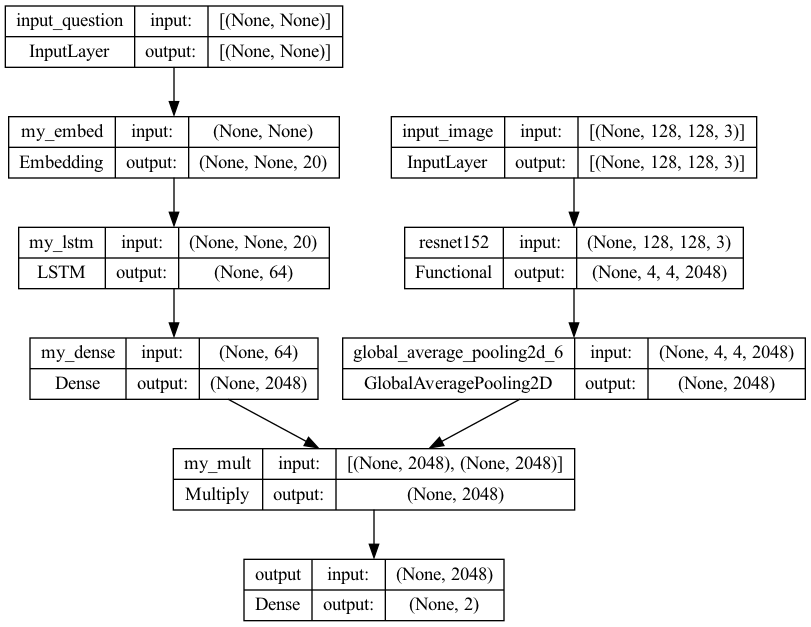

In [91]:
# from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import ResNet152

def build_model(img_size, vocab_size, num_answers):
    # Define the ResNet50 conv_base for image input
    conv_base = ResNet152(include_top=False, weights='imagenet', input_shape=img_size + (3,))
    conv_base.trainable = False

    img_input = keras.Input(shape=img_size + (3,), name="input_image")
    img = conv_base(img_input)
    img = layers.GlobalAveragePooling2D()(img)
    
    # Define RNN for language input
    q_input = keras.Input(shape=(None,), name="input_question")
    q = layers.Embedding(input_dim=vocab_size, output_dim=20, name="my_embed")(q_input)
    q = layers.LSTM(64, name="my_lstm")(q)
    
    # Transform the LSTM output to match the shape of the ResNet50 output
    q = layers.Dense(2048, activation='relu', name="my_dense")(q)
    
    # Combine CNN and RNN
    mrg = layers.Multiply(name="my_mult")([img, q])
    
    # Output
    output = layers.Dense(num_answers, activation='softmax', name="output")(mrg)
    vqa_model = keras.Model(inputs=[img_input, q_input], outputs=output)
    # Learning rate
    vqa_model.compile(keras.optimizers.Adam(learning_rate=0.001),
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])
    return vqa_model

# Get the model
model = build_model(image_size, vocab_size, num_answers)
model.summary()
plot_model(model, show_shapes=True)



In [ ]:
# # This model is the deeper LSTM Q from Figure 8 in
# # https://arxiv.org/pdf/1505.00468.pdf
# def build_model(img_size, vocab_size, num_answers):
#     # Define the VGG19 conv_base for image input
#     img_input = keras.Input(shape=img_size + (3,), name="input_image")
#     img = layers.Flatten(name="my_flat")(img_input)
#     img = layers.Dense(64, activation='relu',name="my_dense")(img)
#     #Define RNN for language input
#     q_input = keras.Input(shape=(None,), name="input_question")
#     q = layers.Embedding(input_dim=vocab_size, output_dim=20,name="my_embed")(q_input)
#     q = layers.SimpleRNN(64,name="my_rnn")(q)
#     # Combine CNN and RNN
#     mrg = layers.Multiply(name="my_mult")([img, q])
#     # Output    
#     output = layers.Dense(num_answers, activation='softmax', name="output")(mrg)
#     vqa_model = keras.Model(inputs=[img_input, q_input], outputs=output)
#     vqa_model.compile(keras.optimizers.Adam(learning_rate=0.01),
#                       loss='sparse_categorical_crossentropy',
#                       metrics=['accuracy'])
# #     vqa_model.compile(keras.optimizers.Adam(learning_rate=0.001),
# #                       loss='sparse_categorical_crossentropy',
# #                       metrics=['accuracy'])
#     return vqa_model


# # Get the model
# model = build_model(image_size, vocab_size, num_answers)
# model.summary()
# plot_model(model, show_shapes=True)


# Training and Evaluating
Let's now starting the training process.



In [92]:
# Train the model
history = model.fit(
    train_dataset,
    epochs=25,
    validation_data=val_dataset
)


Epoch 1/25


2023-07-14 12:43:44.265585: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-07-14 12:43:44.266832: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-07-14 12:43:44.267989: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

16/16 [==============================] - ETA: 0s - loss: 0.6936 - accuracy: 0.5000

2023-07-14 12:45:25.553995: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-07-14 12:45:25.555442: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-07-14 12:45:25.557211: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

16/16 [==============================] - 111s 6s/step - loss: 0.6936 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/25
16/16 [==============================] - 109s 7s/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/25
16/16 [==============================] - 119s 8s/step - loss: 0.6926 - accuracy: 0.5000 - val_loss: 0.6917 - val_accuracy: 0.5933
Epoch 4/25
16/16 [==============================] - 121s 8s/step - loss: 0.6868 - accuracy: 0.5667 - val_loss: 0.6823 - val_accuracy: 0.7000
Epoch 5/25
16/16 [==============================] - 123s 8s/step - loss: 0.6652 - accuracy: 0.6394 - val_loss: 0.6788 - val_accuracy: 0.5467
Epoch 6/25
16/16 [==============================] - 120s 8s/step - loss: 0.6494 - accuracy: 0.6455 - val_loss: 0.6829 - val_accuracy: 0.5533
Epoch 7/25
16/16 [==============================] - 116s 7s/step - loss: 0.6344 - accuracy: 0.6535 - val_loss: 0.5949 - val_accuracy: 0.7333
Epoch 8/25
16/16 [======

Save the created model. It is important to note that we are saving with the model:
1. The `answers`: which is important for submission as we will submit answers and not indexes.
1. The `token_to_num`: which is important for submission as il allows to map tokens to indexes.
2. The `image_size`: which is important to resize the test images.

In [93]:
import time,os
# timestr = time.strftime("%Y%m%d-%H%M%S")
timestr = time.strftime("%Y\%m\%d-%H:%M")
print ("Current date:{}".format(timestr))

Current date:2023\07\14-15:09


In [94]:
cd '/Users/niko/Desktop/Challenge/'

/Users/niko/Desktop/Challenge


In [95]:
# Creating a directory
os.makedirs('models/{}'.format(timestr)) 
model_adr = 'models/{}/model.h5'.format(timestr)

In [96]:
# Saving to the directory
model.save(model_adr, overwrite=True, save_format='h5')
with h5py.File(model_adr, mode='a') as f:
    f.create_dataset('answers', data=answers)
    f.create_dataset('vocab', data=vocab)

# Monitoring and analysis of the model

The next step consists of monitoring the traning process to investigate possible overfitting.


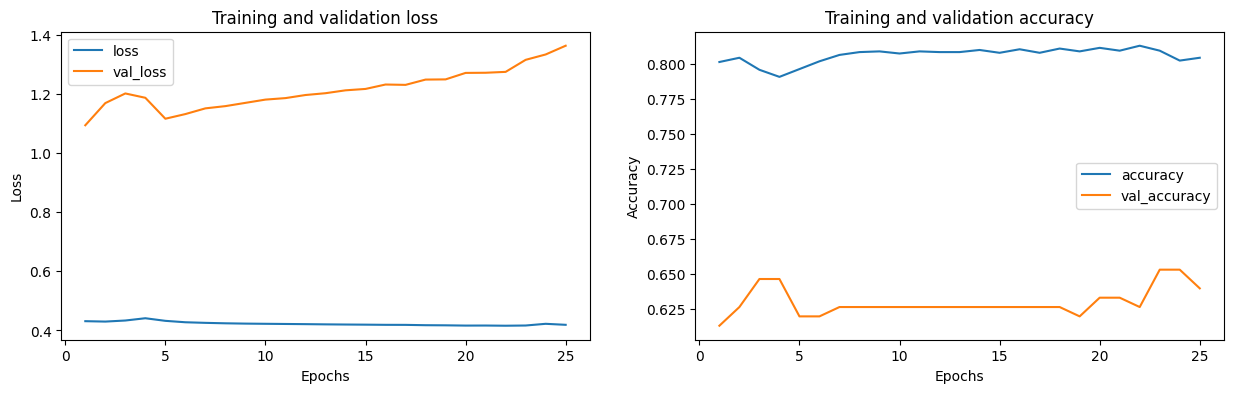

In [88]:
def learning_plots(history):
    plt.figure(figsize=(15, 4))
    ax1 = plt.subplot(1, 2, 1)
    for l in history.history:
        if l == 'loss' or l == 'val_loss':
            loss = history.history[l]
            plt.plot(range(1, len(loss) + 1), loss, label=l)

    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    ax2 = plt.subplot(1, 2, 2)
    for k in history.history:
        if 'accuracy' in k:
            loss = history.history[k]
            plt.plot(range(1, len(loss) + 1), loss, label=k)
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()


learning_plots(history)


Run the `classification_report` function below to build a text report showing the main classification metrics for your model:



In [89]:
y_prob = model.predict(val_dataset)
y_pred = y_prob.argmax(axis=-1)
print(classification_report(anno_val, y_pred, target_names=answers))


2/2 [==============================] - 8s 1s/step
              precision    recall  f1-score   support

         yes       0.68      0.53      0.60        75
          no       0.62      0.75      0.67        75

    accuracy                           0.64       150
   macro avg       0.65      0.64      0.64       150
weighted avg       0.65      0.64      0.64       150



## Inference and visualization

Let's check results on some validation samples



2023-07-14 12:31:02.762751: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [150]
	 [[{{node Placeholder/_0}}]]
2023-07-14 12:31:02.763168: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [150]
	 [[{{node Placeholder/_0}}]]
2023-07-14 12:31:03.492419: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' wi

4/4 [==============================] - 9s 2s/step


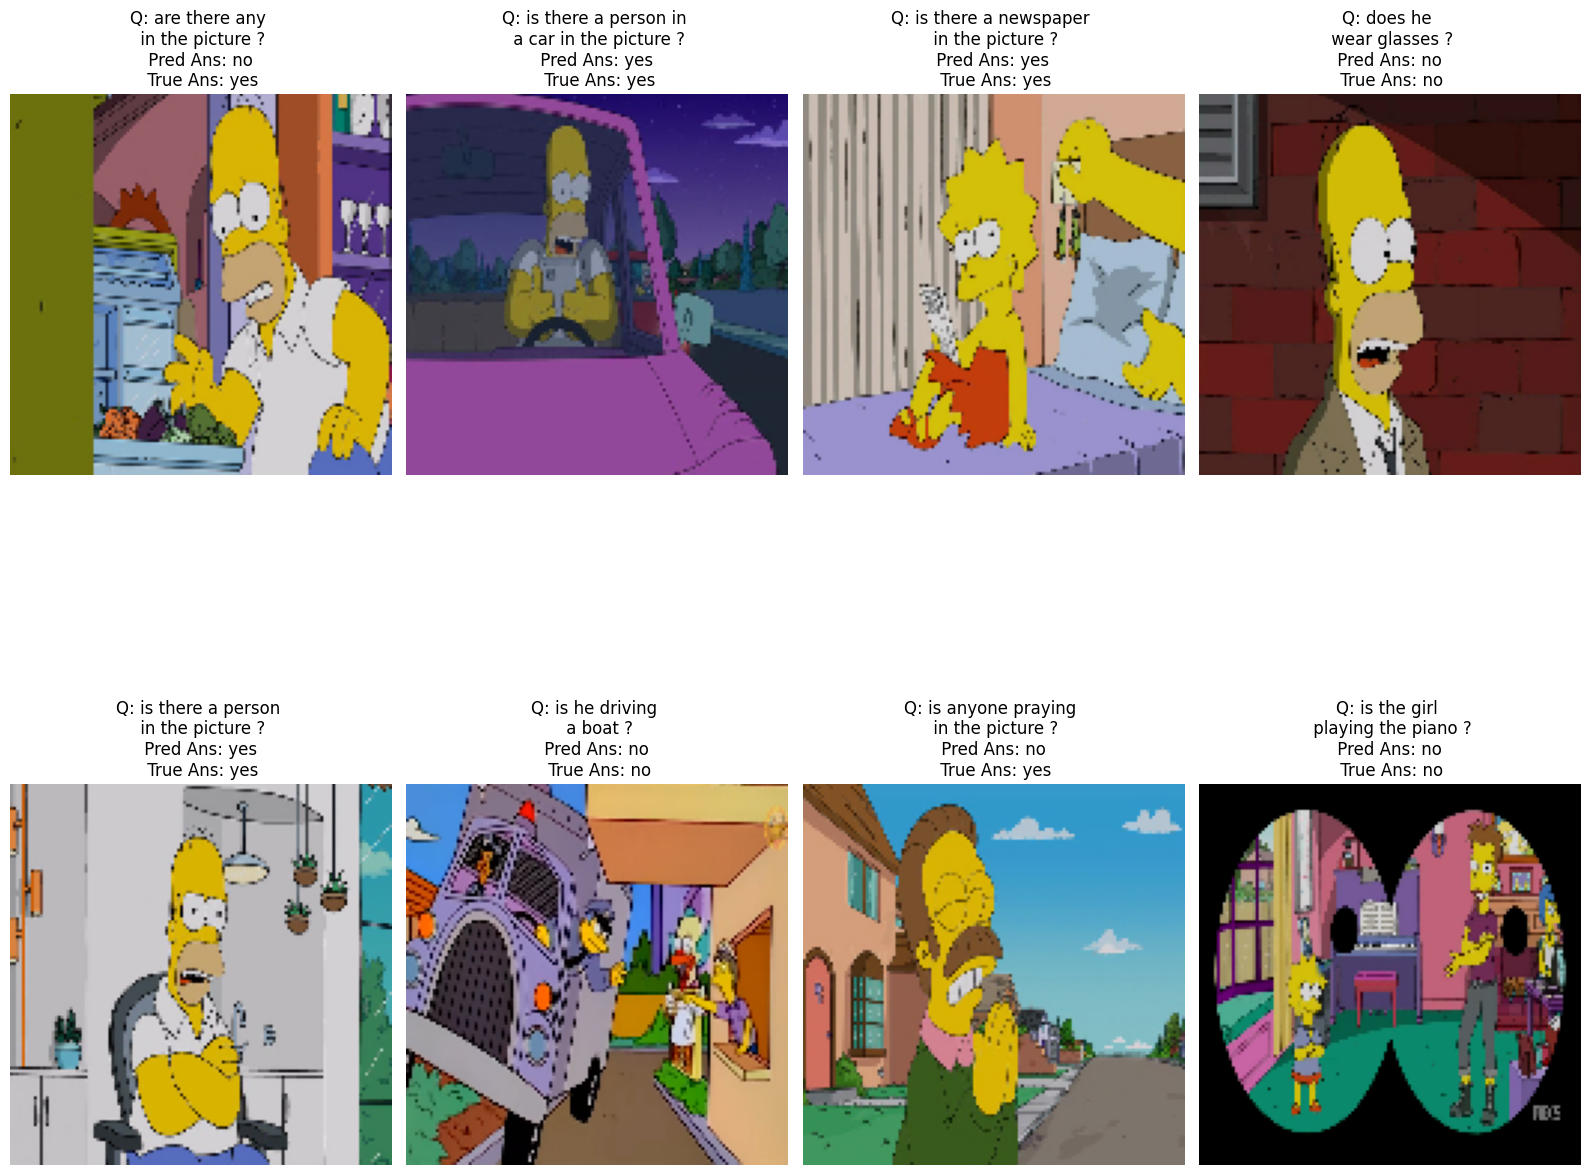

In [90]:
for batch in val_dataset.shuffle(20).take(1):
    imgs_batch = batch[0][0]
    q_batch = batch[0][1]
    ans_batch = batch[1]    
    answer_texts = [answers[i] for i in ans_batch]
    preds = model.predict(batch[0])
    pred_texts = [answers[i] for i in np.argmax(preds, axis=1)]
    q_orig = []
    for q in q_batch:
        q = num_to_token(q).numpy()
        q = [t.decode("utf-8") for t in q]
        q = list(filter(('[UNK]').__ne__, q))
        q.insert(int(len(q) / 2), '\n')
        q = ' '.join(q)
        q_orig.append(q)
    _, ax = plt.subplots(2, 4, figsize=(16, 16))
    for i in range(8):
        example_input = (np.array([imgs_batch[i]]), np.array([q_batch[i]]))
        title = f"Q: {q_orig[i]}\n Pred Ans: {pred_texts[i]} \n True Ans: {answer_texts[i]}"
        ax[i // 4, i % 4].imshow(imgs_batch[i])
        ax[i // 4, i % 4].set_title(title)
        ax[i // 4, i % 4].axis("off")
plt.tight_layout()
plt.show()


Observe where are the errors!

**Congratulation on building your model and submitting to CodaLab! We hope that your model will achieve a high accuracy on the testset.**


# Acknowledgment


**Author:** [Mohamed Reda Bouadjenek](https://rbouadjenek.github.io/), Lecturer of Applied Artificial Intelligence,

**Institution:** Deakin University, School of Information Technology, Faculty of Sci Eng & Built Env

**Adress:** Locked Bag 20000, Geelong, VIC 3220

**Phone:** +61 3 522 78380

**Email:** reda.bouadjenek@deakin.edu.au

**www.deakin.edu.au**

<div>
<img style="float: left;" src="https://github.com/rbouadjenek/deakin-ai-challenge2023/blob/main/images/deakin2.png?raw=1" width="200" >
</div>
<br>
<br>
<br>
<br>

<div>  <a href="https://twitter.com/DeakinAI2021" > <img style="float: left;" src="https://irisconnect.com/uk/wp-content/uploads/sites/3/2020/12/twitter-Follow-us-button.png" width="200" > </a>
</div>